In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
cancer = pd.read_csv('/content/Breast_cancer_data.csv')
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<Axes: >

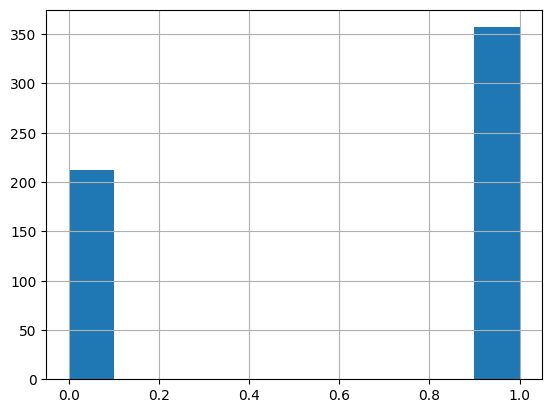

In [ ]:
cancer['diagnosis'].hist()

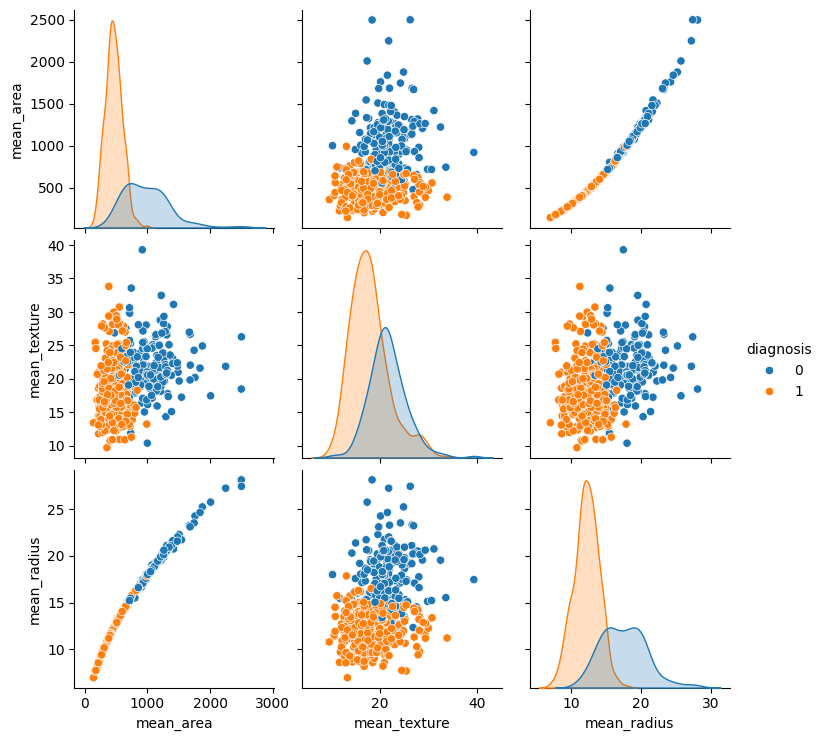

In [ ]:
sns.pairplot(cancer[['diagnosis','mean_area','mean_texture','mean_radius']],hue='diagnosis')
plt.show()

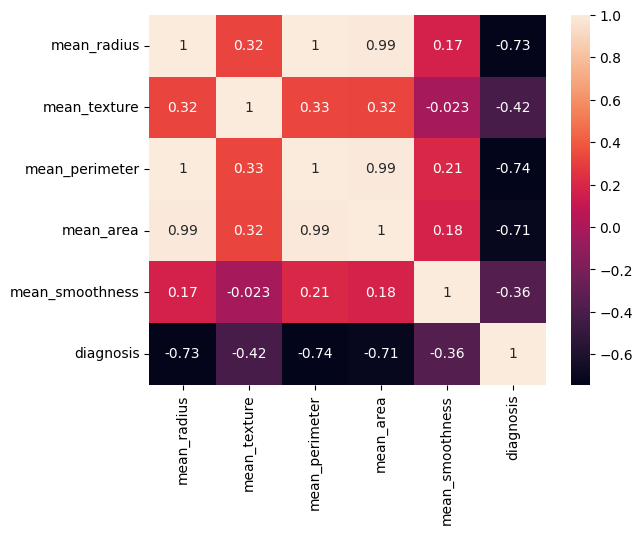

In [ ]:
corelation_matrix = cancer.corr()
sns.heatmap(corelation_matrix,annot=True)
plt.show()

<Axes: >

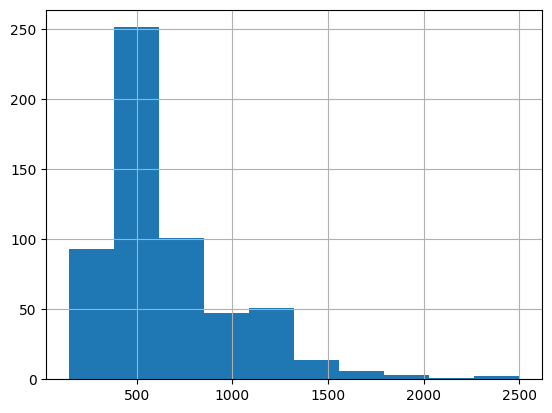

In [ ]:
cancer['mean_area'].hist()

<Axes: >

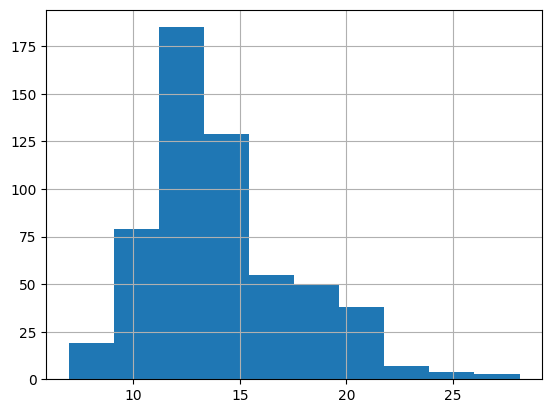

In [ ]:
cancer['mean_radius'].hist()

<Axes: >

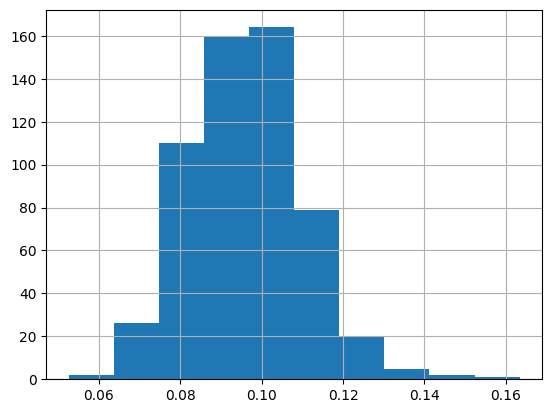

In [ ]:
cancer['mean_smoothness'].hist()

<Axes: >

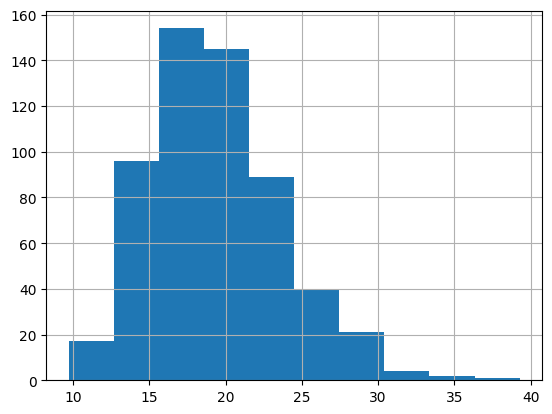

In [ ]:
cancer['mean_texture'].hist()

<Axes: >

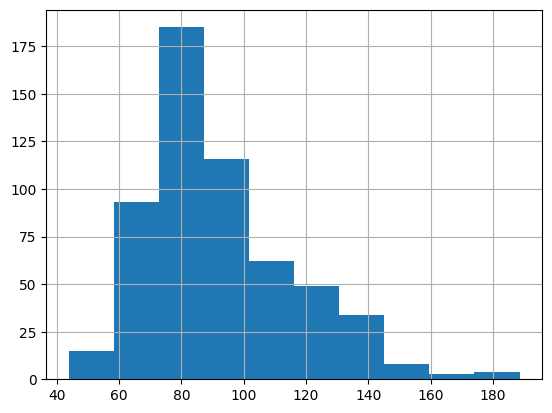

In [ ]:
cancer['mean_perimeter'].hist()

In [ ]:
cancer = cancer.drop(columns=['mean_area','mean_perimeter'])

SyntaxError: unterminated triple-quoted string literal (detected at line 35) (<ipython-input-1-0ca1f188fb0f>, line 9)

In [ ]:
def prior_prob(df,y):
  classes = sorted(list(df[y].unique()))
  prior=[]
  for j in classes:
    prior.append(len(df[df[y]==j])/len(df))
  return prior
print(prior_prob(cancer,'diagnosis'))

[0.37258347978910367, 0.6274165202108963]


In [ ]:
def gaussian(df,feature_name,feature_val,y,label):
  feature = list(df.columns)
  df = df[df[y] == label]
  mean = df[feature_name].mean()
  std = df[feature_name].std()
  prob_gaussian = (1/(std* np.sqrt(2*np.pi)) * np.exp(-(feature_val-mean)**2 / (2 * std**2)))
  return prob_gaussian


In [ ]:
ans = gaussian(cancer,'mean_radius',19.69,'diagnosis',1)
print(ans)

2.835772437459969e-05


In [ ]:
def naive_bayes_categorical(df, X, Y):
    features = list(df.columns)[:-1]

    prior = prior_prob(df, Y)

    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= gaussian(df, features[i], x[i], Y, labels[j])


        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cancer, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score,accuracy_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


In [ ]:
social = pd.read_csv('/content/Social_Network_Ads.csv')
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x= social.iloc[:,[1,2,3]].values
y=social.iloc[:,-1].values
x

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [ ]:
le  = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = sc.transform(X_train)


In [ ]:

classifier = GaussianNB()
classifier.fit(X_train,Y_train)


GaussianNB()

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[ 0 72]
 [ 0 48]]
0.5714285714285715
0.4


In [ ]:
df = pd.read_csv('/content/german_credit_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df = df.drop(['Saving accounts','Checking account'], axis =1)

KeyError: "['Saving accounts', 'Checking account'] not found in axis"

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,1169,6,5,1
1,1,22,0,2,1,5951,48,5,0
2,2,49,1,1,1,2096,12,3,1
3,3,45,1,2,0,7882,42,4,1
4,4,53,1,2,0,4870,24,1,0


In [ ]:
X1 = df.iloc[:,[1,2,3,4,5,6]].values
y1 = df.iloc[:,-1].values

In [ ]:
X1

array([[  67,    1,    2,    1, 1169,    6],
       [  22,    0,    2,    1, 5951,   48],
       [  49,    1,    1,    1, 2096,   12],
       ...,
       [  38,    1,    2,    1,  804,   12],
       [  23,    1,    2,    0, 1845,   45],
       [  27,    1,    2,    1, 4576,   45]])

In [ ]:
X1_train, X1_test, y1_train, y1_test =train_test_split(X1,y1 , test_size =.2, random_state = 1)

In [ ]:
le = LabelEncoder()
text_features = ['Sex','Housing' , 'Purpose','Risk']
for i in text_features:
  df[i] = le.fit_transform(df[i])

df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,1169,6,5,1
1,1,22,0,2,1,5951,48,5,0
2,2,49,1,1,1,2096,12,3,1
3,3,45,1,2,0,7882,42,4,1
4,4,53,1,2,0,4870,24,1,0


In [ ]:
model = MultinomialNB()
model.fit(X1_train,y1_train)

MultinomialNB()

In [ ]:
y1_preds = model.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, y1_preds))
print(f1_score(y1_test, y1_preds))

[[ 26  33]
 [ 38 103]]
0.7436823104693141


<Axes: >

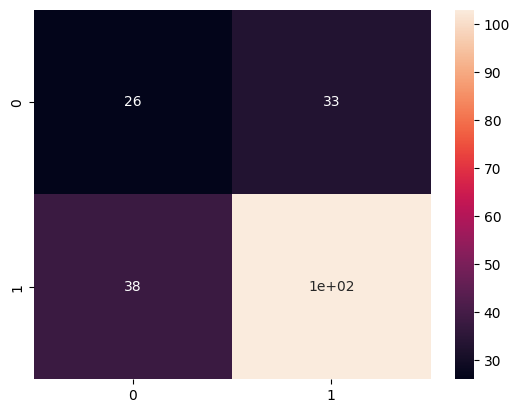

In [ ]:
sns.heatmap(confusion_matrix(y1_test, y1_preds),annot=True)